In [83]:
import pandas as pd
import matplotlib as plt

from urllib.request import urlopen
from tempfile import TemporaryFile
from zipfile import ZipFile

%matplotlib inline

with urlopen('http://www.electoralcommission.org.uk/__data/assets/file/0004/191650/2015-UK-general-election-data-results-WEB.zip') as response:
    with TemporaryFile() as local:
        local.write(response.read())
        local.seek(0)
        with ZipFile(local, 'r') as archive:
            with archive.open('RESULTS.csv', 'r') as results_file:
                results_2015 = pd.read_csv(results_file, encoding='latin_1')

In [100]:
df = results_2015[['Constituency Name', 'Party abbreviation', 'Votes']]
df = df[df['Party abbreviation'].isin(['Con','Lab','LD','SNP','UKIP','Green'])]
con_lab = df.pivot(index='Constituency Name', columns='Party abbreviation', values='Votes')
snp = con_lab.loc[lambda df: df.SNP > 0, :]
snp

Party abbreviation,Con,Green,LD,Lab,SNP,UKIP
Constituency Name,,,,,,
Aberdeen North,5304.0,NaN,2050.0,11397.0,24793.0,NaN
Aberdeen South,11087.0,964.0,2252.0,12991.0,20221.0,897.0
Airdrie and Shotts,3389.0,NaN,678.0,15108.0,23887.0,1088.0
Angus,12900.0,965.0,1216.0,3919.0,24130.0,1355.0
Argyll and Bute,7733.0,NaN,14486.0,5394.0,22959.0,1311.0
"Ayr, Carrick and Cumnock",10355.0,NaN,855.0,14227.0,25492.0,1280.0
Banff and Buchan,13148.0,NaN,2347.0,2647.0,27487.0,NaN
"Berwickshire, Roxburgh and Selkirk",19817.0,631.0,10294.0,2700.0,20145.0,1316.0
"Caithness, Sutherland and Easter Ross",2326.0,NaN,11987.0,3061.0,15831.0,981.0


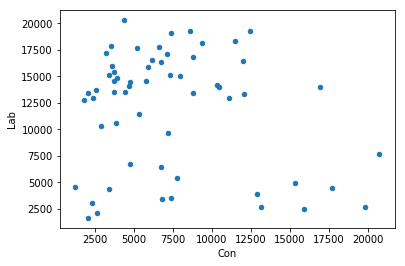

In [101]:
snp.plot(kind='scatter', x='Con', y='Lab')